In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load dataset

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,gre,sop,cgpa,admitted
0,337,4.5,9.65,1
1,324,4.0,8.87,1
2,316,3.0,8.00,1
3,322,3.5,8.67,1
4,314,2.0,8.21,0


In [3]:
X = df.iloc[:,0:3] # Features
y = df['admitted'] # Target

## Check dimensions

In [4]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))
print ('We have m = %d training examples' % (len(y)))

The shape of X is: (400, 3)
The shape of y is: (400,)
We have m = 400 training examples


## Visualize the data
Before starting to implement any learning algorithm, it is always a good idea to visualize the data if possible. Here, the distribution and correlation of the features are plotted.

C:\Users\Bregning\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


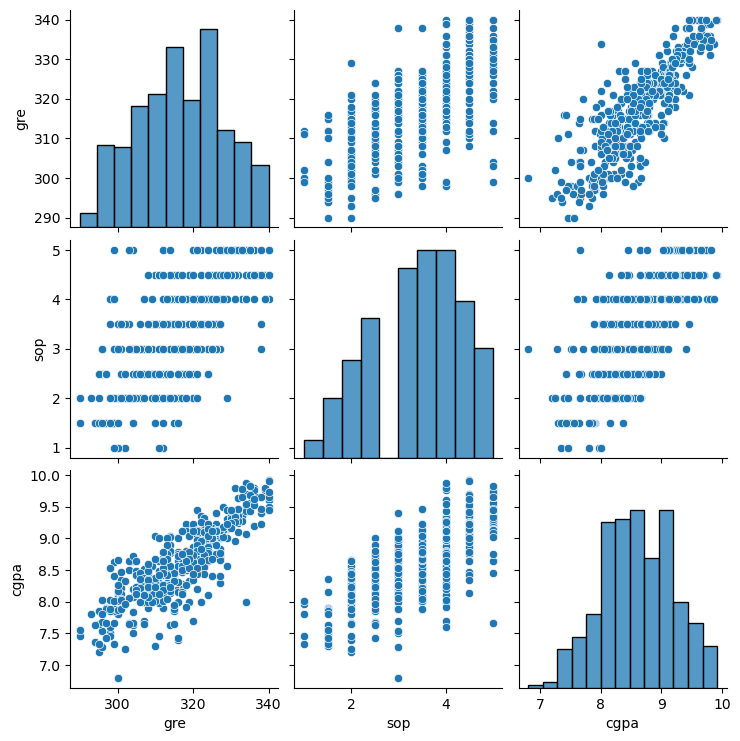

In [5]:
sns.pairplot(X)

In [6]:
# Convert into numpy arrays
X = np.asarray(X)
y = np.asarray(y)

## Normalize data

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Train / Test split
66% of the data is contained in the train set and 33% in the test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (268, 3)
The shape of y_train is: (268,)
The shape of X_test is: (132, 3)
The shape of y_test is: (132,)


## Sigmoid Function

For a logistic regression, the model is represented as

$$
f_\boldsymbol{w},b(x) = g(\boldsymbol{w} \cdot \boldsymbol{x} + b)
$$

where function g is the sigmoid function. The sigmoid function is defined as

$$
g(z) = \frac{1}{1+e^{-z}}
$$

In [10]:
def sigmoid(z):
    """
    Compute the sigmoid of z
         
    """
    g = 1/(1+np.exp(-z))
    
    return g

In [11]:
assert sigmoid(0) == 0.5, "Function should return 0.5"

## Cost Function for logistic regression

For logistic regression, the cost function is of the form

$$
J(\boldsymbol{w}, b) = \frac{1}{m} \sum_{i=0}^{m-1} \text{loss}(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)},y^{(i)})
$$

where m is the number of training examples in the dataset and $\text{loss}(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)},y^{(i)})$ is the cost for a single data point, which is

$$
\text{loss}(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)},y^{(i)}) = (-y^{(i)} \cdot log(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)})) - (1-y^{(i)}) \cdot log(1-f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)})
$$

$f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}$ is the model's prediction, while $y^{(i)}$ is the actual label.


In [12]:
def compute_cost(X, y, w, b):
    """
    Computes the cost over all examples
    Returns:
      total_cost: (scalar)
    """
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost

Test with all weights and bias equal to zero

In [13]:
test_w = np.array([0.0, 0.0, 0.0])
test_b = 0
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.693


Test with randomly initialized weights around zero and a bias of 0.1

In [14]:
test_w = np.random.uniform(low=-0.1, high=0.1, size=3)
test_b = 0.1
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.693


## Gradient for logistic regression

Here, I compute the terms
$$
\frac{\partial J(\boldsymbol{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}) - \boldsymbol{y}^{(i)})
$$
$$
\frac{\partial J(\boldsymbol{w},b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}) - \boldsymbol{y}^{(i)}) \cdot x_j^{(i)}
$$

In [15]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
   
    return dj_db, dj_dw

In [16]:
# Compute gradient with w initialized to zeroes
initial_w = np.zeros(X.shape[1])
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.055970149253731345
dj_dw at initial w (zeros):[-0.2970890396075424, -0.22819759048554564, -0.2553432481057162]


In [17]:
# Compute and gradient with randomly initialized weights
test_w = np.random.uniform(low=-0.01, high=0.01, size=3)
test_b = 0.01
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

dj_db at test_w: -0.0534253511896581
dj_dw at test_w: [-0.2974081457122508, -0.2297370113864118, -0.25593550077123567]


## Gradient Descent

Now, I will implement the gradient descent algorithm and update the parameters according to:

$$
\text{repeat until convergence:}\newline
    \qquad b = b - \alpha \cdot \frac{\partial J(\boldsymbol{w},b)}{\partial b} \newline
    \qquad w_j = w_j - \alpha \cdot \frac{\partial J(\boldsymbol{w},b)}{\partial w_j}
$$

In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Run the gradient descent function with randomly initialized weights. 

Save the weights, bias and loss history.

In [27]:
np.random.seed(32)
intial_w = np.random.uniform(low=-0.01, high=0.01, size=3)
initial_b = 1


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w, b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.76   
Iteration 1000: Cost     0.60   
Iteration 2000: Cost     0.53   
Iteration 3000: Cost     0.50   
Iteration 4000: Cost     0.49   
Iteration 5000: Cost     0.48   
Iteration 6000: Cost     0.47   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.47   
Iteration 9000: Cost     0.47   
Iteration 9999: Cost     0.46   


Using "J_history" I investigate the cost during training. When using a regular gradient descent, this value should always decrease, which is a way to check if it working correctly.

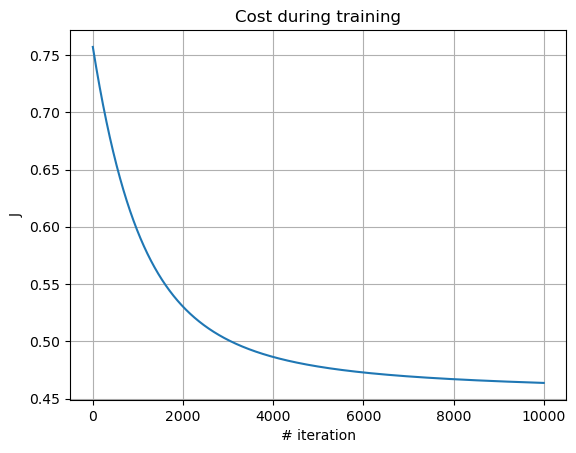

In [28]:
plt.figure()
plt.plot(J_history)
plt.title('Cost during training')
plt.xlabel('# iteration')
plt.ylabel('J')
plt.grid()

## Evalution
We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set.

First, I compute the prediction from the model
$$
f(x^{(i)}) = g(w\cdot x^{(i)})
$$

Then I introduce a simple decision boundary of 0.5.

If $f(x^{(i)}) \geq 0.5 $, predict $y^{(i)} = 1$.

If $f(x^{(i)}) < 0.5 $, predict $y^{(i)} = 0$


In [29]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    return p

Use this function to compute the accuracy on the training set

In [30]:
#Compute accuracy on our training set
p = predict(X_train, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 76.865672


and the test set

In [31]:
#Compute accuracy on our training set
p = predict(X_test, w, b)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

Test Accuracy: 72.727273


Train accuracy and test accuracy are close to eachother, but both perform quite poorly. 

This model suffers from high bias among many things.
Given the small amount of data examples and few features, this performance is expected. 

##### Improvements:
- Increase number of training examples 
- Increase number of features
- Let the model run for a longer time

Implement regularization if the model has high variance with more training examples.